# Análise estatística
### A base de tudo 

_Thiago Laidler Vidal Cunha_

**Referências:**
>    Aulas do prof Bruno Morgado OV-UFRJ

>    (Cambridge) J.V. Wall, C. R. Jenkins - Practical Statistics for Astronomers (2003)

>    João Ismael, Estatística básica a arte de trabalhar com dados (2009)

>    P.Morettin, Estatística Básica (2010)

>    Charles Wheelan, Estatística, o que é, para que serve, como funciona.

>    Leonard Mlodinow, O Andar do Bêbado - Como o Acaso Determina Nossas Vidas
    

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import latexify
import random

## Planejamento 

    1 - Métodos científico 
    2 - Cuidado com estatística descritiva e descrições enganosas 
    3 - Probabilidade Básica + Bayes + problemas com probabilidade 
    4 - Distribuições + teorema do limite central
    5 - Estatística Clássica
    6 - Correlações + Métodos

# 1)
## O método científico

O método científico nada mais é que um conjunto de normas dos procedimentos que produzem o conhecimento científico. Consiste  em  juntar  evidências  empíricas verificáveis,  baseadas  na  observação  de experimentos  de  maneira  sistemática  e controlada.

Analisamos estas evidências com o uso da lógica e a utilizamos para refutar (ou, por negação,  comprovar)  as  diferentes  teorias científicas.
    
    É através do método científico que, com o auxilio da estatística, podemos explorar o mundo ao nosso redor de forma coerente e informativa.

# 2)
## Cuidados com estatística descritiva e descrições enganosas!
 - A média, a mediana e suas simplificações 
 
A partir de uma base estatística bem consolidada, e uma curiosidade em explorar o mundo (que todo cientista tem ou deve ter), podemos explorar questões interessantes que, aparentemente, não estão relacionadas. 

Por exemplo, (1) Qual a situação da saúde econômica da classe média hoje?; e (2) quem foi o maior jogador de beisebol de todos os tempos?
    
    (1) Essa pergunta é vital para a política de qualquer país. O bem-estar financeiro desse grupo tende a ser um indicador fundamental da saúde econômica de uma nação. 
    (2) Essa pergunta é trivial. No entanto, assim como a primeira, nos é útil para ilustrar as forças e limitações da estatística descritiva (números e cálculos que usamos para sintetizar dados brutos).
    
Podemos tentar demonstrar que Derek Jeter é um grande jogador de beisebol ao descrever cada rebatida em cada jogo da Major League que ele jogou (dados brutos muito dificeis de se analisar, tendo em vista que Jeter jogou por aproximadamente dezessete anos), ou podemos calcular que ao final da temporada de 2011, Jeter teve uma média de rebatidas na carreira de 0,313. Essa é uma estatística descritiva.

Acontece que a **média** de rebatidas é uma simplificação grosseira das dezessete temporadas de Jeter. Os especialistas em beisebol possuem um bando de estatísticas descritivas que consideram mais valiosas do que a média de rebatidas. Ainda assim, idealmente, gostaríamos de achar o equivalente econômico da média de rebatidas, ou algo ainda melhor. Queremos uma _medida simples e precisa_ de como o bem-estar econômico do trabalhador típico tem mudado nos últimos anos. Uma tentativa razoável seria calcular a mudança na renda per capita no decorrer de uma geração, (aproximadamente trinta anos). A renda per capita é uma média simples: renda total dividida pelo tamanho da população. Por essa medida, a renda média no Brasil subiu de 3.100 dolares em 1990 para 6.796,84 dolares em 2020.
    
    Há um problema. O cálculo está tecnicamente correto, mas totalmente errado em termos da nossa interpretação. Além da não correção pela inflação (3.100 dolares em 1990 equivalem a 6.324,54 dolares em 2020), a renda média do Brasil não é igual a renda do brasileiro médio!

A renda per capita pega meramente toda a renda ganha no país e a divide pelo número de pessoas, o que não nos informa muita coisa. Um crescimento explosivo na renda do top 1% da pirâmide social pode aumentar significativamente a renda per capita sem que nenhum centavo a mais entre no bolso do restante da população. 
    
> Do beisebol à renda à astrofísica, a tarefa básica quando se trabalha com dados é sintetizar uma grande dose de informação. Há cerca de 200 milhões de habitantes no Brasil, e uma planilha poderia armazenar o nome e histórico de renda de cada indivíduo. Poderíamos ter acesso total à informação que desejamos sobre a saúde econômica do país. Todavia, seria também tão difícil de manejar que não nos diria absolutamente nada. No trabalho como astrônomos precisamos lidar com quantidade gigantescas de dados, e caímos na mesma problemática.
    
    
    
    

Ou seja, para tornar os dados úteis, escolhemos simplificar. Realizamos cálculos para reduzir um complexo arranjo de dados e um punhado de números que descrevam esses dados, exatamente da mesma forma que sintetizamos uma complexa e multifacetada performance de dança com um número: 9,8.

> A estatística descritiva nos dá um resumo manejável e significativo dos fenômenos, no entanto, **qualquer simplificação convida ao abuso.** 

Voltando á análise da renda per capita, vemos claramente que calcular a **média** de um grupo pode não ser o ideal. Se em um grupo de 9 trabalhadores, com renda média de 2.000 reais por mês, se encontram num bar com um amigo rico, com renda de 50.000 reais por mês, o ganho médio do grupo de 10 amigos sobe, sem que os trabalhadores recebam mais. Por essa razão, temos outra estatística que também sinaliza o 'meio' de uma distribuição: a **mediana**.

    A mediana é o ponto que divide uma distribuição ao meio (em que metade das observações jaz acima e a outra metade abaixo). No caso dos amigos no bar, mesmo que entre mais um amigo rico, a mediana não irá se alterar (e será o valor de 2000 reais).
> Para distribuições sem valores atípicos sérios, a **mediana** e a **média** serão semelhantes. 

A mediana é interessante nesses casos de problemas _limões_ (termo popularizado por economistas que analisavam mercado de carros usados), em que alguns valores atípicos inflam a média, mas não a mediana. 

> Nem a mediana, nem a média são difíceis de calcular; a chave é determinar que medida do 'meio' é mais acurada (proxima do ideal) numa situação particular. 


- Outras estatísticas descritivas:

A mediana tem alguns correspondentes úteis, podemos dividir a distribuição pela metade, em **quartis** *(cada um sendo um recorte de 25% da distribuição)* ou em **decis** *(cada um sendo um recorte de 10%)*. Note que estamos explorando conceitos _relativos_ (se analisamos a performance de um aluno, a dificuldade da prova pode ser relevada já que seu resultado final é comparado ao restante da turma) em contraste com valores _absolutos_ (a nota tirada na prova, independente de qual foi a performance alheia).

Outra estatísitca que pode nos ajudar a descrever o que de outro modo poderia ser apenas um juntamento de números é o **desvio padrão** (medida de como os dados se dispersam em relação à média). 
> O quanto elas estão espalhadas?

$DP^{2} = \sum_{i=1}^{N} \frac{(x_{i} - \tilde{x})^2}{n}$

 Suponhamos que coletassemos dados sobre o peso de 250 pessoas num avião com destino a São Paulo e também levantasse o peso de uma amostra de 250 qualificados para a Maratona de Niterói. 
 
 Agora, suponha que o peso médio para ambos os grupos seja aproximadamente o mesmo, digamos setenta quilos (sabendo que, no mesmo vôo, teremos pessoas que precisarão ocupar quase duas poltronas inteiras, assim como alguns bebês de colo e crianças malcriadas).
 
Com base nas ferramentas descritivas introduzidas até aqui, **os pesos dos passageiros do avião e dos maratonistas são quase identicos, mas não são!** Sim, os pesos terão o mesmo 'meio', mas os passageiros do avião têm uma dispersão muito maior em torno do ponto médio. Os pesos dos passageiros estarão mais 'espalhados' enquanto os maratonistas parecerão pesar mais ou menos a mesma coisa. 
> O desvio padrão é a estatística que nos permite atribuir valor a essa dispersão em torno da média. 

Uma vez que conheçamos a **média**, a **mediana** e o **desvio padrão** para qualquer conjunto de dados, teremos em mãos algum resultado intelectual sério. 

- Distribuição Normal

Sabendo disso, faz-se um bom momento para introduzirmos o conceito de **distribuição normal**. Dados distribuídos normalmente são simétricos em torno de sua média, num formato de sino.

    A distribuição normal descreve vários fenômenos comuns, como a distribuição de frequência com a qual as pipocas estouram numa panela (aos poucos a quantidade de caroços estourando vai aumentando até um máximo, e em seguida torna a cair na mesma proporção que aumentou). As alturas das pessoas têm uma distribuição mais ou menos normal, o que significa que são aproximadamente simétricas em torno de 1,70 metros. 

As *estatísticas descritivas* nos dão a percepção de fenômenos que nos importam. Nesse espírito, podemos voltar a explorar sobre a saúde econômica da classe média brasileira.

Para avaliar isso, podemos examinar as mudanças no salário mediano (corrigido pela inflação) durante as últimas décadas, assim como avaliar os salários no 25° e 75° percentis (razoavelmente limites inferior e superior da classe média). 

Além disso, devemos nos atentar na avaliação da renda ou salários (um é a soma de todos os pagamentos de diferentes fontes, enquanto o outro é aquilo que é pago pelo trabalho). Um trabalhador que pegue outro trabalho irá aumentar sua renda, mas talvez não tenha aumento de salário. Se os indivíduos precisam trabalhar mais para ganhar mais, é difícil avaliar o efeito geral sobre seu bem-estar.

> Ideia de projeto: buscar os dados de salários nas últimas três décadas e analisar sua evolução em cada quartil (plotar real x tempo)

- Descrições podem ser enganosas!

 Embora o campo da estatística esteja enraizado na matemática, o uso da estatística para descrever fenômenos complexos não é exato. Isso deixa uma boa brecha para obscurescer a verdade. 
 > Só há três tipos de mentiras: mentiras, mentiras deslavadas e estatísticas. Mark Twain (humorista)

Já que há inúmeras maneiras de descrever o mesmo fenômeno usando a estatística, a descrição que escolhemos usar (ou não usar) terá profundo impacto sobre a impressão que deixamos. 

O primeiro cuidado é a diferenciar **precisão** e **acurácia**: precisão reflete o grau de exatidão da nossa medida, enquanto a acurácia é a medida da consistência geral de um número com a verdade. 
> Posso apontar para uma pessoa perdida pela cidade, que siga 3,15 km a leste para encontrar o posto mais próximo. A indicação é muito precisa, mas pode não ser acurada (digamos que o posto se encontra ao norte) e ela se perder ainda mais.

A precisão pode mascarar a inacurácia, dando-nos um falso senso de certeza.
> Como ocorreu com Joseph McCarthy, senador anti-comunista americano que, na década de 50, agitou ao ar uma folha de papel e declarou "Tenho aqui na minha mão uma lista de 205 nomes que foram informados ao secretário de Estado como sendo membros do Partido Comunista e que mesmo assim ainda estão trabalhando e elaborando políticas no Departamento de Estado." Descobriu-se mais tarde que o papel não tinha nome algum, mas a especificidade da acusação deu-lhe credibilidade.

Esse tipo de erro afeta parte fundamentais da sociedade, como no exemplo dos modelos de risco de Wall Street antes da crise financeira de 2008. Seus resultados eram bem precisos. O conceito de "valor em risco" permitia às empresas quantificar com precisão a quantidade de capital da firma que podia ser perdido em diferentes cenários. O problema era que os modelos ultrassofisticados eram o equivalente a calibrar nossa fita métrica para jardas. A matemática era complexa e misteriosa. 

As respostas produzidas eram tranquilizadoramente **precisas**. Mas as premissas embutidas nos modelos sobre o que poderia acontecer aos mercados globais estavam simplesmente erradas, tornando as conclusões totalmente **incauradas**, a ponto de desestabilizar não só o Wall Street, mas toda a economia global. 

Até nossas velhas amigas, média e mediana, podem ser usadas com finalidade nefastas. Consideremos os cortes de imposto da era Bush nos EUA, que foram pregados como algo positivo pela administração da época. Enquanto forçava o plano, a administração ressaltava que 92 milhões de americanos receberiam uma redução tributária média de mais de 1.000 dolares. No entanto, essa síntese não estava acurada. 

Embora 92 milhões de americanos tenham começado a pagar menos imposto, a maioria dessa gente não teve um corte de cerca de 1000 dolares. O corte tributário mediano era de menos de 100 dolares. Um número relativamente pequeno de indivíduos muito ricos era elegível para os cortes de impostos muito grandes (distorcendo a média). Nesse caso, a **média nos engana**, e a mediana nos salva devido a sua não sensibilidade a valores extremos.

Obviamente, a mediana pode nos enganar também, justamente devido a sua falta de sensibilidade. Suponha que tenhamos uma doença potencialmente fatal, cuja cura foi até desenvolvida, mas o remédio é extremamente caro e tem efeitos colaterais sérios. *Será que funciona?*, perguntamos. Daí, temos acesso a informação de que há um aumento de duas semanas na mediana de expectativa de vida entre pacientes com a mesma doença. *Talvez a droga não valha a pena...*

Contudo, nesse caso, **a mediana nos engana**! Se muitos pacientes não reagem ao novo tratamento, mas que um grande número (digamos, entre 30~40%) fica inteiramente curado, esse bom desempenho não fica visível na mediana (a expectativa de vida de pelo menos 30% dos pacientes saltou décadas, mas não tivemos essa informação). Nesse caso, pacientes atípicos (que melhoram e vivem bastante) são muito relevantes para nossa decisão. 

> Portanto, a má conduta estatística tem muito pouco a ver com a matemática malfeita. O mais importante é temos boa capacidade de julgamento e integridade.

# 3)
## Probabilidade básica e Teorema de Bayes

A probabilidade é o estudo de eventos e resultados envolvendo um elemento de incerteza. Investir no mercado de ações envolve incerteza. O mesmo ocorre com o lançamento de uma moeda. Jogar uma moeda quatro vezes envolve níveis de incerteza adiocionais. 

O conceito de probabilidade  está intimamente  ligado  aos  eventos randômicos e às medições feitas nas mais diferentes áreas da ciência. Como quando dizemos que a massa da Lua é 5.0 +/- 0.3 unidades. *O que queremos dizer com isso?*

- Experimento aleatório: onde podemos descrever um conjunto de todos os resultados possíveis, mas não podemos dizer, a priori, qual desses resultados acontecerá.
- Espaço amostral: conjunto de todos os possíveis resultados do experimento aleatório. 
- Evento: subconjunto do espaço amostral.

 - O que é probabilidade? 

$P = \frac{Evento(A)}{EspaçoAmostral (\Omega)} = \frac{QUERO}{TUDO}$

> Em setembro de 2011, um satélite da Nasa de 6.5 toneladas estava mergulhando em direção a Terra e a expectativa era de que ele despedaçasse quando entrasse na atmosfera. Quais as chances de que alguém fosse atingido pelos destroços? Os cientistas estimaram que a probabilidade era de uma em 21 milhões. 

- Sair cara no lançamento da moeda: 

$P = \frac{1}{2}$

- Ocorrer um numero par no lançamento de um dado (A = {2,4,6}):

$P(A) = \frac{3}{6} = \frac{1}{2}$

- Retirar um rei de paus de um baralho completo e sem coringa:

$P = \frac{1}{52}$

- retirar um rei qualquer:

$P = \frac{4}{42}$

- Conceito frequentista:

Quando o experimento é repetido n vezes sob mesmas condições. Consideramos que evento A ocorreu m vezes entre as n realizações do experimento. Concluimos que a m/n é uma boa aproximação para a probabilidade de A caso n seja muito grande 
> Caso não saibamos se a moeda utilizada está adulterada, e por isso não podendo concluir que temos 1/2 de chance para cada face, jogamos a moeda 1000 vezes e anotamos.



In [2]:
def moedas(probabilidade=0.5,jogadas=1000):
    '''
    retorna uma array com a quantidade de sucesso/tentativa e outra com a quantidade de tentativas
    '''
    c = np.arange(1,101)
    tentativas = 0
    sucesso = 0
    suc = [] #listagem de caras acumuladas/tentativa
    tentativ = [] #listagem tentativas totais 
    for i in range(jogadas):
        if random.choice(c) <= 50:
            sucesso += 1
            tentativas += 1
            suc.append(sucesso/tentativas) #esperamos q a maioria dos numeros dê proximo da probabilidade
            tentativ.append(tentativas)
        else:
            tentativas += 1
    return np.array(suc),np.array(tentativ)

>> Ideia: Tentar refazer essa função sem usar a estratégia de lista aberta. Se inspirar nos codigos do Bruno.

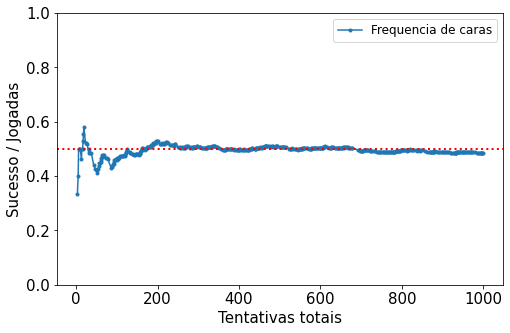

In [3]:
moeda = moedas() #1000 jogadas de moeda de 1/2 probabilidade de cair cara. 
'''
É preciso jogar a função numa variavel pois caso contrario, a cada slice estaremos chamando a função novamente 
e comparando o sucesso e tentativas de casos distintos.
'''
plt.figure(figsize = [8,5])
plt.plot(moeda[1],moeda[0], '.-', label='Frequencia de caras')
plt.legend(fontsize = 12)
plt.ylim(0, 1.0)
plt.ylabel('Sucesso / Jogadas', fontsize=15)
plt.xlabel('Tentativas totais', fontsize=15)
plt.axhline(0.5, color='r', linestyle='dotted', linewidth=2) # ponto de estabilidade
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()   

Aumentando o numero de tentativas e observando a maior estabilidade do gráfico


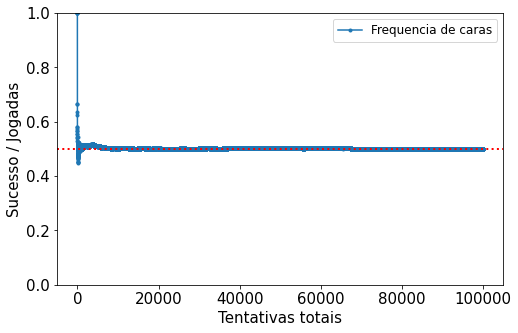

In [4]:
moeda = moedas(probabilidade = 0.5, jogadas = 100000)
'''
É preciso jogar a função numa variavel pois caso contrario, a cada slice estaremos chamando a função novamente 
e comparando o sucesso e tentativas de casos distintos.
'''
plt.figure(figsize = [8,5])
plt.plot(moeda[1],moeda[0], '.-', label='Frequencia de caras')
plt.legend(fontsize = 12)
plt.ylim(0, 1.0)
plt.ylabel('Sucesso / Jogadas', fontsize=15)
plt.xlabel('Tentativas totais', fontsize=15)
plt.axhline(0.5, color='r', linestyle='dotted', linewidth=2) # ponto de estabilidade
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
print('Aumentando o numero de tentativas e observando a maior estabilidade do gráfico')
plt.show()   

> Perceba que o ponto de estabilidade coincide com o que sabemos da probabilidade da moeda dar cara (50%) ao usarmos o conceito clássico de probabilidade no espaço amostral finito uniforme {cara,coroa}.

    O conceito frequentista de probabilidade é mais abrangente do que o clássico, já que também se aplica em espaço amostral não finito uniforme. No entanto, embora o conceito frequentista nos forneça uma forma de medir na prática a probabilidade de ocorrência de um determinado evento, sua aplicabilidade também não é tão ampla como gostaríamos. Há casos em que podemos atribuir um valor à probabilidade de algo ocorrer (como o caso da moeda), mas há outros em que isso não é possível, nos restando apenas a determinação empírica desse valor (tentativa e erro + extrapolar para numeros grandes e ver o ponto de estabilidade).

Temos também que a soma de todas as probabilidade do espaço amostral tem 100% de ocorrer ($P(\Omega) = 1$). E qualquer probabilidade de algum evento deve girar entre 0 e 1.

- Eventos mutuamente exclusivos:

$P(A ou B) = P(A) + P(B)$

- No caso geral:

Temos que descontar dessa soma a probabilidade de A e B ocorrerem simultaneamente.

$P(A ou B) = P(A) + P(B) - P(A e B)$

**OBS**: 

>Quando não existe dependência entre eventos A e B, podemos usar a regra do *E*:
$P(A e B) = P(A) \times P(B)$

>Quando A e B são eventos *mutamente exclusivos* (não podem ocorrer simultaneamente), podemos usar a regra do *OU*:
$P(A ou B) = P(A) + P(B)$

 Muitas vezes é extremamente valioso saber a probabilidade da ocorrência de múltiplos eventos. Quais as chances de faltar eletricidade e o gerador não funcionar? Quando os eventos são independentes, a probabilidade de ocorrer ambos é o produto das respectivas probabilidades. A probabilidade de dar três caras seguidas acaba sendo 1/8, a probabilidade de quatro caras é 1/16. Por isso os avisos de cadastro em redes sociais lhe avisa para aumentar a qualidade da sua senha. Uma senha com apenas seis digitos numéricos pode ser calculado por $10^6$, podendo ser facilmente calculado por um computador. No entanto, ao adicionar letras e simbolos em cada digito provavel, temos que cada caracter possui 36 possibilidades, aumentando a quantidade de senhas possíveis para $36^6$.
 
 Se supomos que estejamos interessados na probabilidade de que um evento ocorra ou outro (novamente INDEPENDENTES), teremos que sua probabilidade consiste em sua soma simples. Por exemplo, a probabilidade de dar 1, 2 ou 3 com um único lançamento de dado é a soma das probabilidade individuais 1/6+1/6+1/6 = 1/2.

- A chance de não correr:

$P = 1 - P(A)$



- Condicional e independencia de eventos:


Dado os eventos A e B:

$P(B|A) = \frac{P(AeB)}{P(A)}$ , se P(A) > 0

Caso A esteja contido em B, (A e B) = A, (A ou B) = B. $P(A|B) = P(A)/P(B)$. $P(B|A) = 1$.

Pela definição de probabilidade condicional temos:

$P(A e B) = P(A|B)\times P(B) = P(B|A)\times P(A)$

Também chamado de **Teorema de Bayes**.

Analisando com atenção o Teorema, vemos que o fato de sabermos que o evento B ocorreu de fato pode alterar nossas expecitativas sobre A e, quando se trata de probabilidades condicionais, ele nos permite inverter a ordem dos condicionamentos. 

Note que se A e B são eventos independentes e tais que P(A) > 0 e P(B) > 0, então P(A|B) = P(A) e P(B|A) = P(B) e, portanto, saber que B ocorreu não altera nossas expectativas nesse caso. 

>> Ideia: adicionar explicações sobre teorema de Bayes vista em: https://www.youtube.com/watch?v=R13BD8qKeTg

 - No geral

Dados eventos A e B no mesmo espaço amostral:

$P(A ou B) = P(A) + P(B) - P(A e B)$

(Quando A e B não tem elementos em comum, P(A e B) = 0).

A probabilidade também nos possibilita calcular o que pode ser a ferramenta mais útil em toda tomada de decisão: o **valor esperado**. Também chamado de *payoff* de algum evento, se trata da soma de todos os diferentes resultados, cada um pesado pela sua probabilidade. Por exemplo, o preço de um bilhete de loteria é calculado para estar acima do valor esperado, pois assim, em larga escala, a banca vence. Veja:

Suponha que você seja convidado a participar de um jogo que rola um único dado. O valor esperado desse jogo é 1 real se você tirar 1, 2 reais se tirar 2, 3 reais se tirar 3 e assim por diante. Qual o valor esperado para um único lance desse dado? Seguindo o que vimos até aqui, cada resultado possível tendo 1/6 chance de ocorrer:

$1/6 \times (1) + 1/6 \times (2) + 1/6 \times (3) + 1/6 \times (4) + 1/6 \times (5) + 1/6 \times (6) = 21/6 = 3,5$

Isso significa que pagar menos de 3,50 reais para jogar um dado será um bom investimento, afinal, o valor esperado de retorno é 3,50 (em larga escala). O que ocorre nos cassinos e loterias, é que o valor vendido é muito acima do ganho esperado (nesse caso, uma rodada no dado custaria 5 reais). Isso significa que a chance de perda é muito maior que a de ganho, e ao longo do tempo a banca vence. Esse calculo não garante que você irá ganhar ou perder dinheiro jogando um vez, mas ajuda a esclarecer quais são os riscos que valem a pena correr.

E o que significa esse *valor esperado*? Em casos de uma distribuição normal ou variável aleatória, será nossa **média** ou **esperança**.

- Variáveis aleatórias

Conhecer as chamadas **variáveis aleatórias** é fundamental para explorar problemas como a de um aluno que queira chutar questões numa prova e saber a chance de passar, ou para uma funcionária que queira estimar a quantidade de mensagens recebidas no e-mail enquanto esteve fora do expediente, ou até de um trabalhador que queria saber qual a chance de gastar no máximo 30 minutos durante sua espera ao ônibus.

Nesses casos, a variável aleatória pode ser expressa por:

$X = $ numero de mensagens no e-mail ou tempo em minutos esperado...

Esse tipo de variável pode ser classificada entre **discretas** (valores assumidos são reais e atribuidos a alguma probabilidade, geralmente num processo de contagem) e **contínuas** (em que sua probabilidade depende de um intervalo, geralmente oriundos de uma medição). Em cada caso, não é possível prever com exatidão qual valor será assumido pela variável. No entanto, será possível fazer afirmações probabilísticas sobre seu comportamento.

> A descrição dos valores que a variável aleatória pode assumir juntamente com a probabilidade de ela assumir cada valor é o que chamamos de **distribuição de probabilidade**!

>Uma variável aleatória (v.a.) é, portanto, uma função que associa cada elemento de um espaço amostral a um número real.

A variável aleatória irá carregar os mesmos conceitos vistos anteriormente, tendo uma **média** (ou *esperança*), uma **variância** (média ponderada dos quadrados das diferenças... ou simplesmente o desvio padrão ao quadrado), e um **desvio-padrão**, já visto anteriormente.

O coeficiente de variação de uma variável aleatória discreta será o quociente entre DP e a média (esperança):

$CV = \frac{DP}{E}$

As principais formas de trabalhar com variáveis aleatórias discretas são através de modelos, que iremos explorar mais no próximo capítulo.

A probabilidade nos fornece ferramentas para lidar com *incertezas*. Você não deve jogar na loteria, deve investir no mercado de ações apenas para longo prazo, deve adquirir seguro para algumas coisas e não para outras. A probabilidade pode nos ajudar a maximizar ganhos em programas de jogos, ou em estimar com mais clareza a medida de algum corpo celeste. 

Dito isso, a **probabilidade não é determinista**. Não se deve comprar bilhetes de loteria, mas ainda há a chance de ganhar dinheiro se o fizer. 



- Vejamos alguns casos em que a probabilidade e o uso da programação pode nos mostrar o que esperar de situações em larga escala. Compreenderemos melhor o funcionamento desses calculos no próximo capítulo.

### Exemplo 1

Temos N bolas vermelhas e M bolas brancas na urna. Sabemos que N + M = 10.

Tirei e recoloquei 5 bolas da urna (T = 5), destas, obtive 3 bolas vermelhas (R = 3).

Qual a probabilidade de termos N bolas vermelhas na urna?

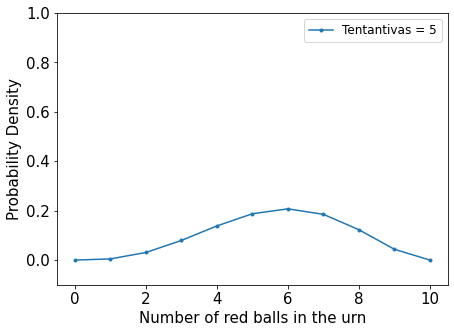

In [5]:
N = np.arange(0,11) # Quantas bolas vermelhas existem na urna
M = 10 - N # Dado que sei quantas bolas vermelhas existem, quantas brancas existem

plt.figure(figsize=[7,5])
T = 5 # bolas TOTAIS retiradas (qualquer cor)
R = 3 # Bolas VERMELHAS retiradas
prob = (((N/(N + M))**R) * (M/(N + M))**(T - R)) # probabilidade 
plt.plot(N, prob/(prob.sum()), '.-', label='Tentantivas = {}'.format(T))
plt.legend(fontsize = 12)
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Number of red balls in the urn', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

*Aumentando os valores de 10 ou 100 vezes, o que ocorre?*

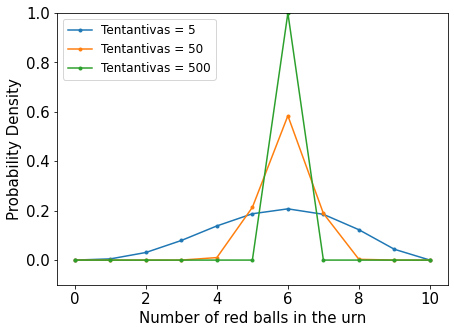

In [6]:
N = np.arange(0,11)
M = 10 - N

plt.figure(figsize=[7,5])
for factor in [1,10,100]:
    T = 5*factor
    R = 3*factor
    prob = (((N/(N + M))**R) * (M/(N + M))**(T - R))
    plt.plot(N, prob/(prob.sum()), '.-', label='Tentantivas = {}'.format(T))
plt.legend(fontsize = 12)
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Number of red balls in the urn', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

 - Quantas tentativas precisamos para ter 100% de certeza?

1075.0


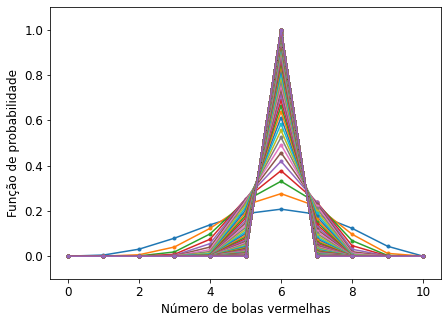

In [7]:
N = np.arange(0,11,1)
M = 10. - N

#print(N)
plt.figure(figsize=[7,5])

for factor in np.arange(1,1000):
    T = 5.*factor
    R = 3.*factor

    prob = ((N/(N+M))**R) * ((M/(N+M))**(T-R))
    prob_norm = prob/prob.sum()

    plt.plot(N, prob_norm, '.-', label='Tentativas = {:02.0f}/{:3.0f}'.format(R,T))
    if len(np.where(prob_norm == 1.0)[0] != 0):
        print(T)
        break
plt.ylim(-0.1, 1.1)
plt.xlabel('Número de bolas vermelhas', fontsize=12)
plt.ylabel('Função de probabilidade', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#pl.legend(fontsize=12)
plt.show()

### Exemplo 2

Antes de 1987, quatro supernovas foram observadas a olho nu em 10 séculos. 

Qual seria a probabilidade de uma supernova ser observada a olho nu no século XX?

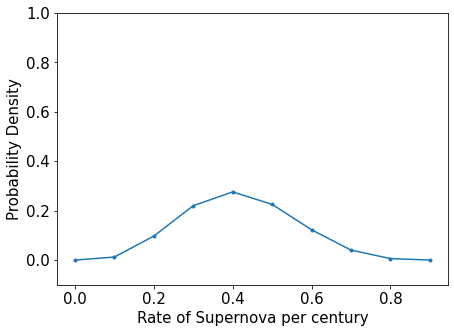

In [8]:
rate = np.arange(0, 1, 0.1)
obs = 4
time_span = 10

prob = (rate**obs) * ((1 - rate)**(time_span - obs))

plt.figure(figsize=[7,5])
plt.plot(rate, prob/(prob.sum()), '.-')
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Rate of Supernova per century', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 4)
## Distribuições e Teorema do Limite Central

Voltando ao tratamento de variáveis aleatórias discretas, temos duas formas principais de trabalhar com elas:

    (1) Modelo Bernoulli: modelo adequado para experimentos aleatórios em que o espaço amostral consta de somente dois resultados 'sucesso' e 'fracasso'. 
    
$E(x) = p$;
$Var(x) = p(1-p)$;
$DP = \sqrt{p(1-p}$;
$CV = \frac{1-p}{p}$;

    (2) Modelo binomial: basicamente o modelo bernoulli replicado várias vezes. 
  A partir daqui faz-se útil revisar *técnicas de contagem!*

>>> resumo técnica de contagens, arranjo, exemplo termodinamica e depois terminar com algum parágrafo de Charles Wheelan sobre problemas da probabilidade.

In [9]:
##Tecnicas de contagem e sua utilidade no calculo de probabilidades

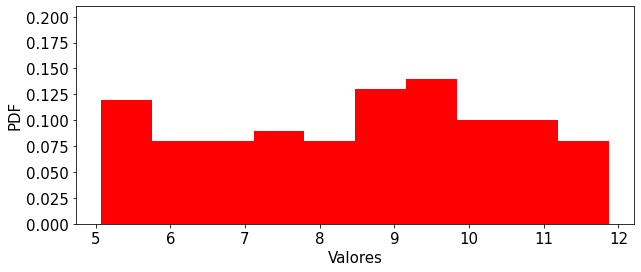

In [10]:
# Criando distribuições uniformes
teste_1 = np.arange(5,12, 7/50)

teste_2 = np.linspace(5,12, 50)

teste_3 = np.random.uniform(5,12, 50)

## Plot da distribuição
bins = 10

distribuicao = np.random.uniform(low=5, high=+12, size=100)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

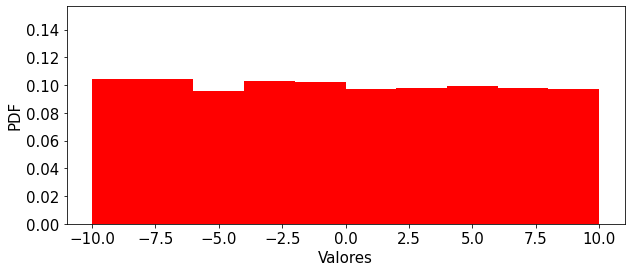

In [11]:
bins = 10

distribuicao = np.random.uniform(low=-10, high=+10, size=10000)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

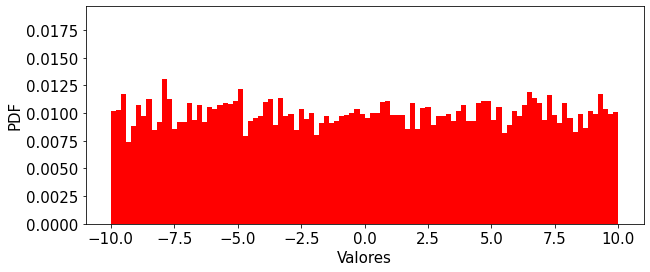

In [12]:
bins = 100

distribuicao = np.random.uniform(low=-10, high=+10, size=10000)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

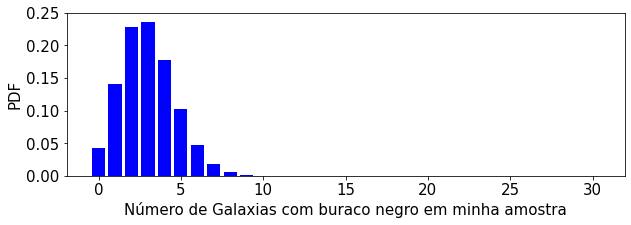

In [13]:
## Distribuição Binomial
import scipy.special as sp

p = 0.1   # probabilidade de sucesso, valores da minha amostra 1.
q = 1 - p # probabilidade de falha.

N = 30    # número de "tentativas", número de objetos estudados na minha amostra 2.

i = np.arange(0, N+1, 1)

pdf = (p**i) * (q**(N - i)) * sp.factorial(N) / (sp.factorial(i)*sp.factorial(N - i))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(i, pdf/pdf.sum(), color='blue', width=0.8)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Número de Galaxias com buraco negro em minha amostra',fontsize=15)
plt.yticks(np.arange(0, 0.3, 0.05),fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - E se fizermos uma distribuição randômica?

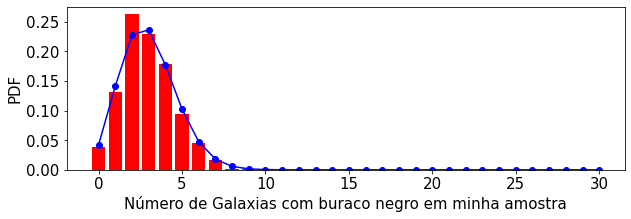

In [14]:
p = 0.1   # probabilidade de sucesso, valores da minha amostra 1.
q = 1 - p # probabilidade de falha.

N = 30    # número de "tentativas", número de objetos estudados na minha amostra 2.

i = np.arange(0, N+1, 1)
pdf = (p**i) * (q**(N - i)) * sp.factorial(N) / (sp.factorial(i)*sp.factorial(N - i))

distribuicao = np.random.binomial(n=30, p=0.1, size=1000)
value, binedge = np.histogram(distribuicao, bins=i)


plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(i, pdf/pdf.sum(), 'bo-')
plt.bar(binedge[:-1], value/np.sum(value), width=0.8*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Número de Galaxias com buraco negro em minha amostra',fontsize=15)
plt.yticks(np.arange(0, 0.3, 0.05),fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Distribuição de Poisson

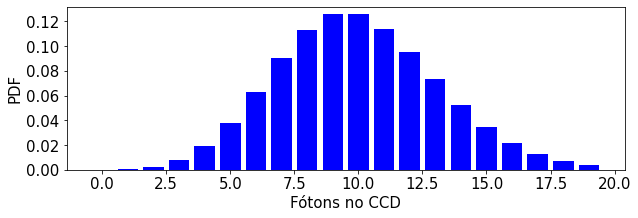

In [15]:
time = 5

mi = 2 * time

n = np.arange(0, mi*2.0, 1.0)

pdf = ((mi**n)/(sp.factorial(n)))*np.exp(-mi)

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.8)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Fótons no CCD',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Distribuição Normal

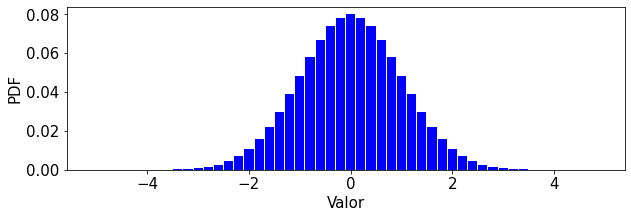

In [16]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.18)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - Distribuição randômica

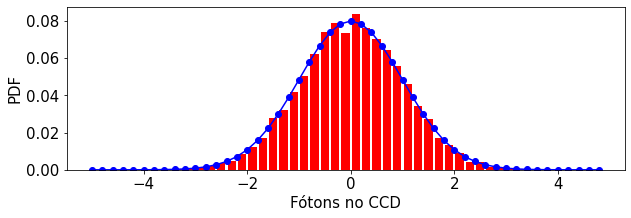

In [17]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

distribuicao = np.random.normal(loc=mu, scale=sigma, size=10000)
value, binedge = np.histogram(distribuicao, bins=n)


plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(n, pdf/np.sum(pdf), 'bo-')
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=0.8*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Fótons no CCD',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - Calculando a probabilidade num intervalo

Probabilidade entre (mu - sigma) e (mu + sigma) = 0.681


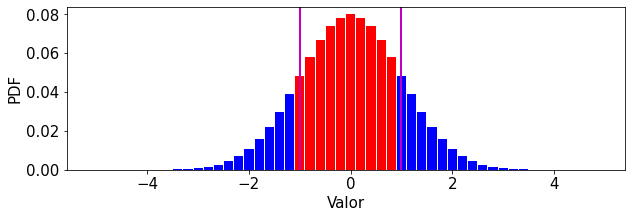

In [18]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.18)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.axvline(mu - sigma, color='m', lw=2)
plt.axvline(mu + sigma, color='m', lw=2)

probabilidade = 0
for i in range(len(n)):
    if (n[i] > mu - sigma) * (n[i] < mu + sigma): #Podemos mudar +-2sigma para termos  95% ou +-3sigma para 99%...
        plt.bar(n[i], pdf[i]/np.sum(pdf), color='red', width=0.18)
        probabilidade += pdf[i]/np.sum(pdf)

print(r'Probabilidade entre (mu - sigma) e (mu + sigma) = {:.3f}'.format(probabilidade))
plt.show()

### Teorema do limite central

Às vezes, a estatística parece mágica! 

Somos capazes de tirar conclusões generalistas e poderosas a partir de dados relativamente escassos. De algum modo podemos adquirir uma percepção significativa de uma eleição presidencial meramente falando ao telefone com mil eleitores. Podemos testar cem peitos de frango em busca de salmonela numa fábrica de processamento de aves e concluir, com base apenas nessa amostra, se a fábrica é inteiramente segura. 

*De onde vem esse poder?*

O teorema do limite central será nossa principal fonte de poder para essas análises (as que envolvem o uso de uma amostra para inferir algo acerca de uma população grande). Esses tipos de inferência podem parecer místicos, mas na verdade são apenas uma combinação de duas ferramentas: **probabilidade** e **amostragem adequada**.

Suponha que estamos em busca de um onibus comum que desapareceu em meio a seu trajeto de praxe. Durante a sua investigação, você encontra um onibus enguiçado em meio a uma estrada deserta. Se você entende que, ao olhar para os passageiros (a média de idade, ou a média de peso) é possível inferir que não se trata do onibus procurado (digamos que se trate de um ônibus escolar, teremos uma média de idade muito menor que o esperado), então você entende a ideia básica do terorema.

O princípio essencial é que uma amostra grande, adequadamente escolhida, remeterá à população da qual foi retirada. Evidentemente haverá variações entre uma amostra e outra (por exemplo, cada ônibus terá uma idade média um pouco diferente, tendo em vista que terá uma mistura de passageiros ligeiramente diferente), mas a probabilidade de que qualquer amostra se desvie enormemente da população subjacente é muito baixa.

Essa lógica que nos possibilitou concluir que não se tratava do onibus perdido, já que a chance de um onibus comum possuir uma idade média próxima dos 13 anos é muito baixa. Você pôde concluir isso com um grau razoável de confiança. Sim, podíamos estar errados, mas a probabilidade nos diz que a maioria das vezes estaremos certos.

*Mas quantas vezes?*

O teorema central do limite nos possibilita fazer as seguintes inferências:

    - Se tivermos informações detalhadas sobre alguma população, então podemos fazer inferências poderosas sobre qualquer amostra adequadamente extraída dela. 
    - Se tivermos informações detalhas sobre uma amostra extraída de modo adequado (média e desvio padrão), podemos fazer inferências surpreendentemente acuradas sobre a população.
    - Se tivermos dados que descrevem uma amostra particular, e dados sobre uma população particular, podemos inferir se a amostra é consistente ou não com uma amostra com probabilidade de ter sido tirada dessa população. 
    - Por fim, se soubermos as características subjacentes de duas amostras, podemos inferir se ambas foram provavelmente tiradas ou não da mesma população. 

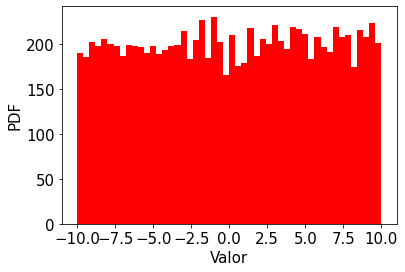

Média da distribuição: -7.151548017972857


In [19]:
distribuicao = np.random.uniform(low=-10, high=+10, size=10000) 
#Distribuição aleatória e uniforme
plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print ('Média da distribuição: '+str(distribuicao[np.random.randint(0, 10000, 2)].mean()))

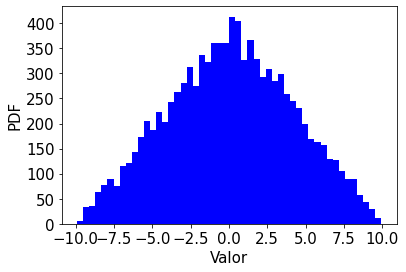

In [20]:
nova_distribuicao = np.array([])

n = 2

for i in range(10000):
    indices = np.random.randint(0, 10000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

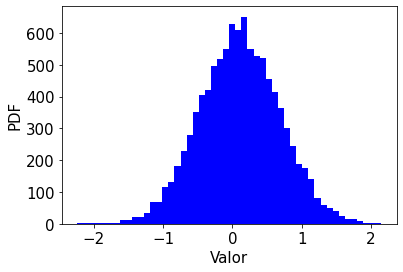

In [21]:
nova_distribuicao = np.array([])

n = 100 #para n muito maior

for i in range(10000):
    indices = np.random.randint(0, 10000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - O mesmo ocorre para distribuições não uniformes

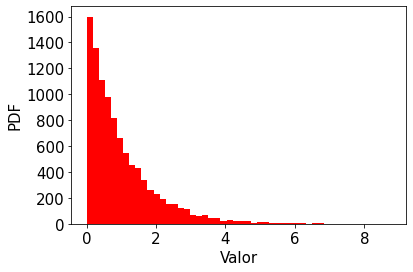

In [22]:
distribuicao = np.random.exponential(scale=+1, size=10000)

plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

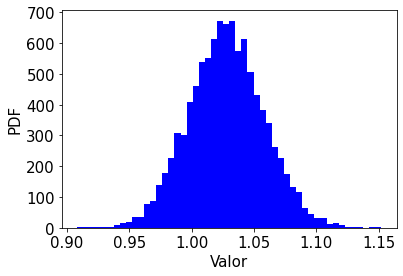

In [23]:
nova_distribuicao = np.array([])

n = 1000 #tente alterar esse numero e verificar o quanto a forma de sino de aproxima para n>>>

for i in range(10000):
    indices = np.random.randint(0, 1000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# 5)
## Estatística clássica

# 6)
## Correlações e Métodos

Imagine que uma noite de observação, um astrônomo queira analisar os dados obtidos (arquivo_1.dat). Esses dados são referentes ao fluxo de luz de duas estrelas que foram medidas simultaneamente em um mesmo conjunto de 100 frames (digamos Estrela A e Estrela B).

Tendo isso em mente, poderíamos nos fazer algumas perguntas:

*Existe correlação entre estas duas estrelas?*

*Qual a probabilidade desta correlação ser real?*

*Se, por um acaso, houve uma observação na noite anterior dessas duas mesmas estrelas em um conjunto de 87 imagens (arquivo_2.dat), qual a probabilidade destes dois conjuntos de dados tenham como origem a mesma distribuição (qual o grau de confiança dessa observação)?*

A correlação mede o grau em que dois fenômenos estão relacionados entre si. Duas variáveis tem correlação positiva se uma variação numa delas é associada a uma variação da outra no mesmo sentido, e uma correlação será negativa se o oposto ocorre. Vejamos o quão disperso é o fluxo de ambas as estrelas:

In [24]:
df_1 = pd.read_csv('arquivo_1.dat', header = 1, delim_whitespace=True) #Data Frame da primeira observação
df_1 = pd.DataFrame(data = df_1.values,columns = ['Estrela A', 'Estrela B'])
df_1.describe()

,Estrela A,Estrela B
count,100.000000,100.000000
mean,138.989146,201.541003
std,25.414835,26.192340
min,71.011480,132.826179
25%,124.417016,184.757203
50%,139.690902,203.802690
75%,156.359194,219.714019
max,201.424672,262.348418


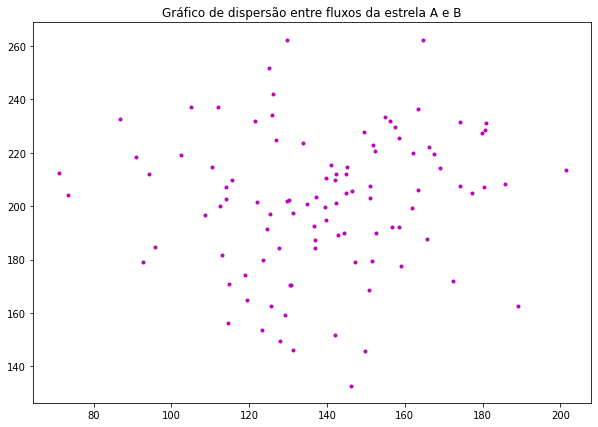

In [25]:
plt.figure(figsize = [10,7])
plt.title('Gráfico de dispersão entre fluxos da estrela A e B')
plt.plot(df_1['Estrela A'], df_1['Estrela B'],'m.') 
plt.show()

Okay, trabalhar com um padrão constituido de pontos dispersos numa tela é um tanto tosco. Em vez disso, podemos utilizar o poder da correlação como ferramenta estatística para encapsular uma associação entre duas variáveis numa única estatística descritiva: **O coeficiente de correlação**.

Este coeficiente se trata de um número único que varia de -1 a +1. Uma correlação de 1 será uma correlação perfeita, enquanto -1 será uma correlação perfeitamente inversa. Quanto mais proximo de 1 ou -1, mais forte a associação. Para esse caso, usarei *Coeficiente de Kendall*, $τ$, que mede o como uma variável aumenta enquanto outra variável também aumenta, sem exigir que o aumento seja representado por uma relação linear.

> **Pearson**:  Paramétrico! Tende para uma distribuição t quando temos duas distribuições normais.

> **Spearman**: Não paramétrico! Tende para uma distribuição t para N grandes. Ao contrário do coeficiente de Pearson, o coeficiente de Spearman não exige a suposição de que a relação entre as variáveis seja linear, nem requer que as mesmas sejam quantitativas – pode inclusive ser utilizado para verificar relação entre variáveis medidas no nível ordinal.

> **Kendall**: Não paramétrico! Tende mais rapidamente para uma distribuição t para N intermediários (preferível). Uma vantagem de tau sobre o coeficiente de Spearman é a possibilidade de ser generalizado para um coeficiente de correlação parcial.

> **OBS:** Uma característica atraente do coeficiente de correlação é que ele não está ligado a nenhuma unidade. Podemos calcular a correlação entre altura e peso - mesmo que a altura seja medida em centímetros e o peso em quilogramas.

In [26]:
x_1 = df_1['Estrela A']
y_1 = df_1['Estrela B']

In [27]:
tau_11, p_value_11 = stats.kendalltau(x_1,y_1)
print('tau = '+str(tau_11)) #Conferir resultado de tau.
print('A probabilidade de nao haver correlacao: '+str(1 - p_value_11))

tau = 0.098989898989899
A probabilidade de nao haver correlacao: 0.8555111790224474


A partir daqui se faz necessário explorar a inferência estatística e uma de suas ferramentas mais famosas, o **teste de hipóteses.**

 A estatística por sí só não prova nada; em vez disso, usamos inferência para aceitar ou rejeitar explicações com base na sua relativa probabilidade. Qualquer inferência estatística começa com uma hipótese nula implícita ou explícita. Essa é nossa premissa de partida, que será rejeitada ou não com base na nossa análise subsequente. 
 
 Se rejeitamos a *hipótese nula*, então geralmente aceitamos alguma hipótese alternativa que seja mais consistente com os dados observados. 
 
 > Por exemplo, no tribunal a hipótese nula H0 é a de que o réu é inocente.
 
Geralmente queremos provar a *Hipótese alternativa* **H1**, enquanto batemos na *Hipótese nula* **H0**. Note que a hipótese nula e a hipótese alternativa são completamente lógicas e, se uma é verdadeira, a outra não é. Se rejeitamos uma afirmação, devemos aceitar a outra.

> Nem sempre provamos a H0, podendo significar apenas que H1 está equivocada ou que as hipóteses não servem para o grupo de dados escolhidos. Em todo caso, é mais seguro afirmar apenas que, *com base nos dados coletados, meramente falhamos em rejeitar H0*.

Geralmente usamos o valor de 5% como limiar mais comum utilizado nas inferências estatísticas. Essa probabilidade é conhecida como *nível de significância* e representa o limite superior para a probabilidade de observação de algum padrão de dados se a hipótese nula fosse verdadeira. Ou seja, podemos rejeitar **H0** no nivel 0.05 se houver uma chance menor do que 5% de obter um resultado no mínimo tão extremo quanto o que observamos se a hipótese nula fosse verdadeira. 

Em outras palavras, se a chance de **H0** ser verdadeira, seguindo os dados coletados, for de 5% ou menos, rejeitaremos ela e aceitaremos **H1**.

- Quanto a comparação da estrela A e B da mesma observação, diremos que:

**H0** : pertencem a mesma distribuição.
**H1** : são objetos totalmente distintos.

Queremos 5% seja a probabilidade dos nossos dados serem referentes ao **H0** caso ela seja verdadeira, importante definir isso previamente para que não haja viés.

Se não chegarmos nesse valor, não poderemos afirmar que **H0** é mentira (lembre do que discutimos antes). 
Ou seja, se os dados se referem a **H0** em apenas 5% ou menos das vezes, ja assumimos que **H1** estará correto. Se as hipóteses foram bem construídas (ou é uma, ou é outra), nossa decisão estará correta em 95% das vezes.


O que chamamos de *p_value* é a probabilidade específica de obter um resultado no mínimo tão extremo quanto o observado caso **H0** fosse verdadeira.

No nosso caso, a probabilidade das estrelas A e B da primeira observação fazerem parte da mesma distribuição será:

In [28]:
print(str((round(p_value_11*100,2)))+'%')

14.45%


 - Fazendo para os dados coletados na segunda observação (se são, de fato, as mesmas estrelas, teremos uma correlação fraca entre elas também).

In [29]:
df_2 = pd.read_csv('arquivo_2.dat', header = 1, delim_whitespace=True) #Data Frame da segunda observação
df_2 = pd.DataFrame(data = df_2.values,columns = ['Estrela A', 'Estrela B'])
x_2= df_2['Estrela A']
y_2=df_2['Estrela B']
tau_22, p_value_22 = stats.kendalltau(x_2,y_2)
print('tau = '+str(tau_22))
print('A probabilidade de nao haver correlacao (H0 rejeitada): '+str(1 - p_value_22))

tau = 0.07297514033680833
A probabilidade de nao haver correlacao (H0 rejeitada): 0.6830945818907175


In [30]:
df_2.describe()

,Estrela A,Estrela B
count,87.000000,87.000000
mean,132.255606,194.484118
std,26.561849,24.340571
min,62.577636,143.982292
25%,117.814211,176.610733
50%,134.793448,196.219248
75%,151.544973,207.845813
max,182.074902,256.714477


Ou seja, percebemos baixa correlação entre as estrelas A e B de ambas as observações, justamente por se tratar de duas estrelas diferentes. Isso vai de encontro com o que sabíamos, tendo em vista que são observações dos mesmos objetos. 
Perceba que a maior correlação para o caso da segunda observação pode ser explicada pelo fato de haver sido captado algum fenômeno atmosférico que tenha afetado ambas estrelas ao mesmo tempo (por exemplo, passagem de nuvens que as ofuscam de forma equivalente), ou algum ruído do instrumento (talvez tenha-se observado com instrumentação diferente, a quantidade menor de imagens pode ser uma consequencia do maior tempo de exposição, o que possibilita a situação em que se captura mais fótons do que o necessário). 

 - **t-student** e **f-test**:

  A *distribuição t de Student* é uma distribuição de probabilidade absolutamente contínua e simétrica, que nos servirá para comparar a média dos dados coletados (que segue distribuição Normal) numa hipótese inicial (**H0**). Funciona mesmo em casos em que não se sabe qual é a média ou o desvio padrão da população, contanto que ela seja normal. 

   Um *teste F* é qualquer teste estatístico no qual a estatística de teste tem uma distribuição F (uma distribuição de probabilidade contínua) sob a hipótese nula, baseando-se na sua variancia. É mais frequentemente usado ao comparar modelos estatísticos que foram ajustados a um conjunto de dados, a fim de identificar o modelo que melhor se ajusta à população da qual os dados foram amostrados. Por exemplo, este teste é util para estudar a hipótese de que as médias de um determinado conjunto de populações normalmente distribuídas, todas com o mesmo desvio padrão, são iguais, por meio da análise de *variância*. 

In [31]:
def tstudent(x,y):
    '''
    recebe dois data frames e retorna o valor do t e o grau de liberdade
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    v = n + m - 2 ##nesse caso estamos comparando apenas dois tipos de dados, entao nosso grau de liberdade terá - dois
    s = np.sqrt((n*(x.std()**2) + m*(y.std()**2))/v)
    return (ux - uy)/(s*np.sqrt(m**(-1) + n**(-1))),v

def f_test(x,y):
    '''
    recebe dois data frames e retorna o valor do f e o grau de liberdade
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    v = n + m - 2 ##nesse caso estamos comparando apenas dois tipos de dados, entao nosso grau de liberdade terá - dois
    s = np.sqrt((n*(x.std()**2) + m*(y.std()**2))/v)
    return (x.std()**2)/(y.std()**2),v

 - Sabendo que os valores da tabela t-student são:
 
 
**(Unicaudal)** Pegando 5% apenas do *lado esquerdo*:

<code>stats.t.ppf(0.05,df=tstudent(x_1,x_2)[1])</code>

**(Unicaudal)** Pegando 5% apenas do *lado direito*:

<code>stats.t.ppf(1 - 0.05, df=tstudent(x_1,x_2)[1])</code>

**(Bicaudal)** Pegando 5% somando-se *ambos os extremos*:

<code>stats.t.ppf((1 - 0.05)/2,df=tstudent(x_1,x_2)[1])</code>

In [32]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(x_1,x_2)[1])
stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1])

1.9728699462074988

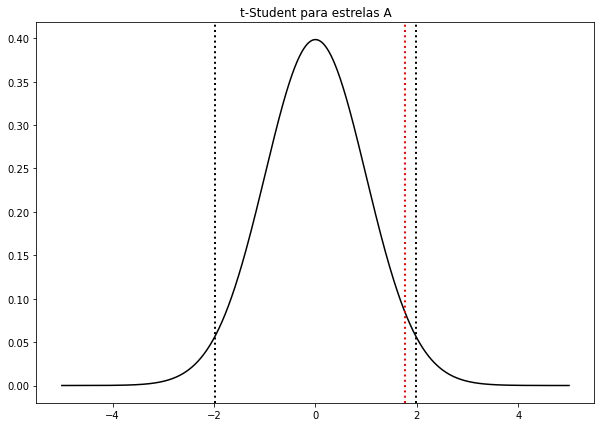

In [33]:
plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas A')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** não pode ser rejeitada seguindo nosso nivel de significancia. Isso significa que suas MÉDIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição. Em outras palavras, isso significa que o fluxo médio das estrelas A1 e A2 cai numa faixa que esperaríamos observar 95 vezes em cem num universo que **H0** seja verdadeira. 
 
 > Se caísse na faixa vista apenas 5 em cem vezes, consideraríamos **H1** correta e descartaríamos **H0**, nesse caso, em média, 95 das vezes em cem estaríamos rejeitando **H0** de forma correta.

 - A mesma análise com a observação da Estrela B:

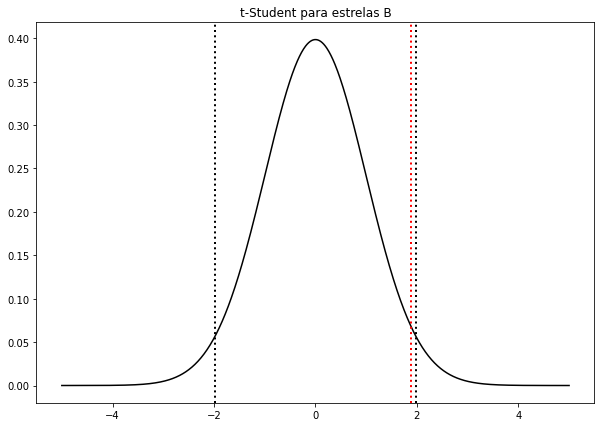

In [34]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(y_1,y_2)[1])

plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas B')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas MÉDIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

Agora iremos fazer o teste F para levarmos em consideração a variancia dos nossos dados.

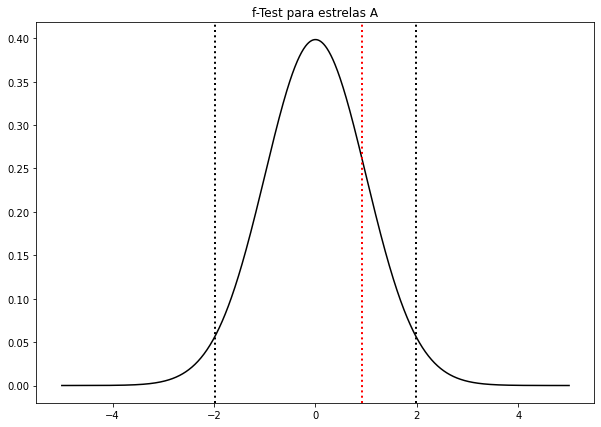

In [35]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=f_test(x_1,x_2)[1])

plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas A')
plt.plot(t_dist,prob,'k')
plt.axvline(f_test(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=f_test(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=f_test(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas VARIÂNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

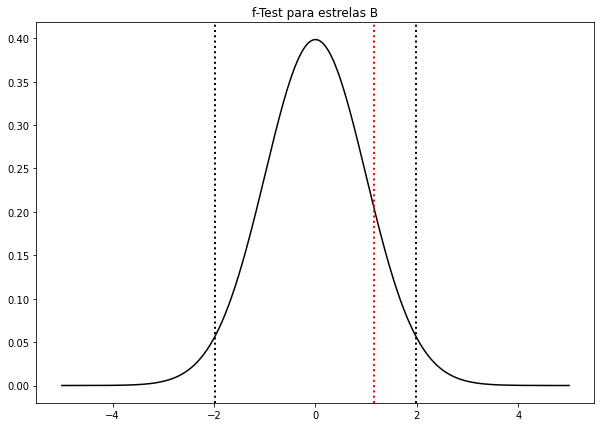

In [36]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=f_test(y_1,y_2)[1])

plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas B')
plt.plot(t_dist,prob,'k')
plt.axvline(f_test(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=f_test(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=f_test(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas VARIÂNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

 - E afinal, qual a probabilidade destes dois conjuntos de dados serem equivalentes (tenham como origem a mesma distribuição)? 

Sabemos que os dados coletados estão dentro do universo **H0**. Ou seja, partindo que **H0** é verdadeiro (as estrelas observadas fazem parte da mesma distribuição), nossos dados concordam com a maioria das outras amostras que viriam da mesma distribuicao. Portanto, podemos afirmar com **95% de certeza** que os dados coletados *vem da mesma distribuição*.
> *Perceba que nesse caso as hipóteses foram escolhidas tal que 'ou elas pertencem ou não pertencem', e, seguindo as amostras coletadas, há 95% de chance dos dados terem vindo de duas estrelas da mesma dsitribuição*.